<a href="https://colab.research.google.com/github/jcjimenezb123/PFM_PronosticoDemanda/blob/master/wine_classification_98_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Loading Dataset

In [2]:
dataset = pd.read_csv("train.csv")

In [3]:
dataset.head()

,id,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0,13.05,0.40,2.40,21.68,71.79,2.33,1.87,0.09,1.30,1.070000,1.13,2.45,96.79,1
1,1,13.01,3.66,2.21,16.53,98.87,2.46,2.34,0.28,1.49,3.690000,0.75,2.79,588.86,0
2,2,13.13,1.14,2.32,18.75,108.51,2.63,2.26,0.13,2.15,5.030000,0.86,2.66,954.80,0
3,3,12.06,1.41,2.04,16.58,73.52,0.84,-0.36,0.37,0.14,7.869999,0.37,1.01,194.88,2
4,4,12.35,1.14,1.91,19.52,77.65,2.09,1.98,0.27,1.03,4.620000,1.11,3.46,502.23,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            534 non-null    int64  
 1   alcohol                       534 non-null    float64
 2   malic_acid                    534 non-null    float64
 3   ash                           534 non-null    float64
 4   alcalinity_of_ash             534 non-null    float64
 5   magnesium                     534 non-null    float64
 6   total_phenols                 534 non-null    float64
 7   flavanoids                    534 non-null    float64
 8   nonflavanoid_phenols          534 non-null    float64
 9   proanthocyanins               534 non-null    float64
 10  color_intensity               534 non-null    float64
 11  hue                           534 non-null    float64
 12  od280/od315_of_diluted_wines  534 non-null    float64
 13  proli

In [5]:
dataset.describe()

,id,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,266.500000,12.596404,1.803371,2.233783,17.876180,92.548633,1.996723,1.534307,0.302210,1.305693,3.889401,0.852569,2.266685,592.646629,0.947566
std,154.296792,0.839504,1.129380,0.285172,3.376112,14.859507,0.652526,1.047399,0.127285,0.614343,2.349626,0.243022,0.740055,333.830211,0.775482
min,0.000000,10.400000,-0.270000,1.150000,7.990000,57.020000,0.630000,-0.490000,0.020000,-0.150000,-0.370000,0.350000,0.640000,9.800000,0.000000
25%,133.250000,11.920000,0.952500,2.050000,15.800000,81.322500,1.470000,0.555000,0.210000,0.892500,2.062500,0.680000,1.612500,352.725000,0.000000
50%,266.500000,12.605000,1.450000,2.230000,17.760000,90.840000,1.995000,1.590000,0.280000,1.260000,3.680000,0.870000,2.405000,521.920000,1.000000
75%,399.750000,13.240000,2.587500,2.430000,19.877500,100.627500,2.510000,2.387500,0.397500,1.640000,5.080000,1.030000,2.830000,807.565000,2.000000
max,533.000000,14.690000,5.570000,3.200000,28.740000,159.460000,3.840000,4.350000,0.620000,3.440000,12.800000,1.690000,3.900000,1654.830000,2.000000


## Data Visualisation

1    212
0    175
2    147
Name: target, dtype: int64


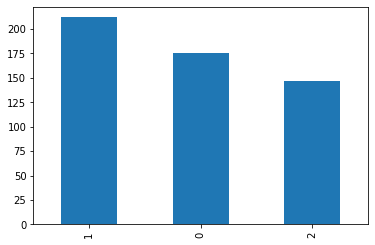

In [6]:
print(dataset.target.value_counts())
dataset.target.value_counts().plot(kind='bar')
plt.show()

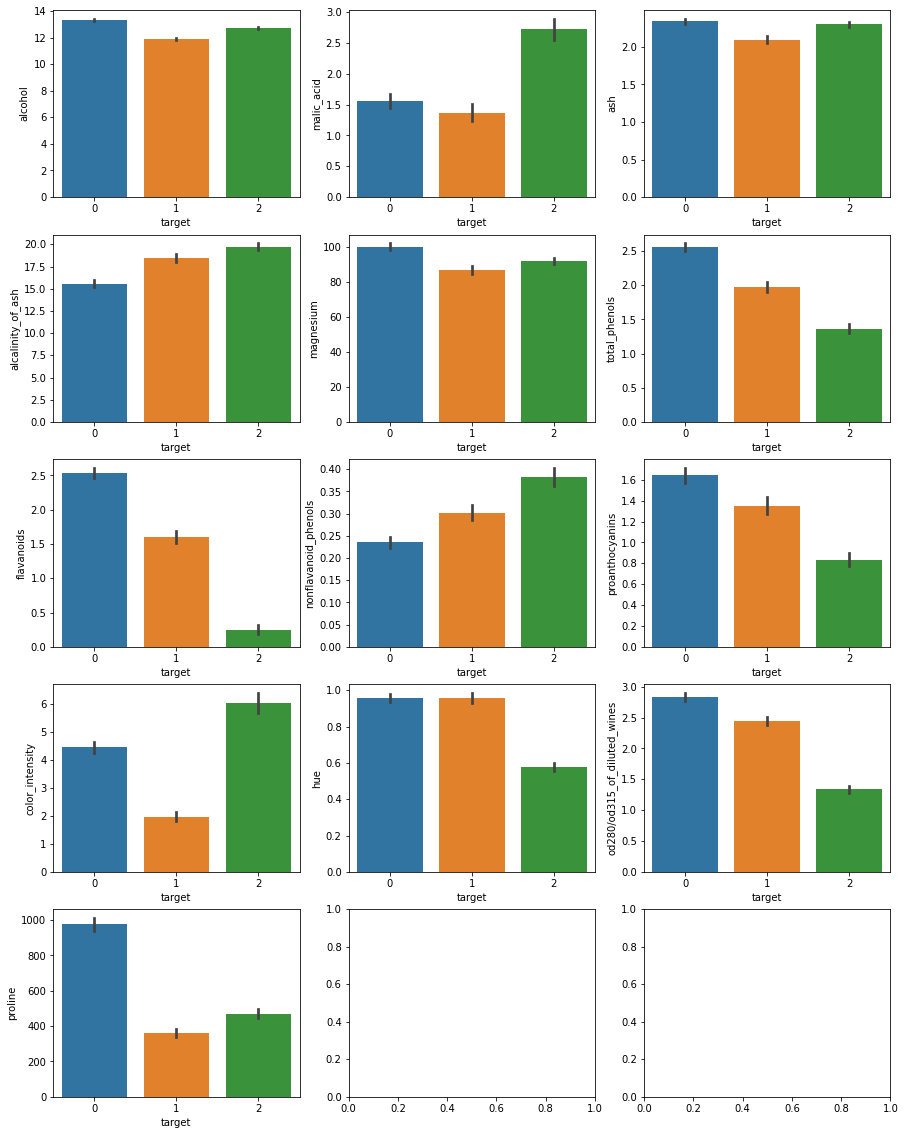

In [7]:
fig, ax = plt.subplots(5,3 , figsize = (15,20)) # Making Subplots

sns.barplot(data = dataset, y ="alcohol", x="target", ax=ax[0,0]);
sns.barplot(data = dataset, y ="malic_acid", x="target", ax=ax[0,1]);
sns.barplot(data = dataset, y ="ash", x="target", ax=ax[0,2]);
sns.barplot(data = dataset, y ="alcalinity_of_ash", x="target", ax=ax[1,0]);
sns.barplot(data = dataset, y ="magnesium", x="target", ax=ax[1,1]);
sns.barplot(data = dataset, y ="total_phenols", x="target", ax=ax[1,2]);
sns.barplot(data = dataset, y ="flavanoids", x="target", ax=ax[2,0]);
sns.barplot(data = dataset, y ="nonflavanoid_phenols", x="target", ax=ax[2,1]);
sns.barplot(data = dataset, y ="proanthocyanins", x="target", ax=ax[2,2]);
sns.barplot(data = dataset, y ="color_intensity", x="target", ax=ax[3,0]);
sns.barplot(data = dataset, y ="hue", x="target", ax=ax[3,1]);
sns.barplot(data = dataset, y ="od280/od315_of_diluted_wines", x="target", ax=ax[3,2]);
sns.barplot(data = dataset, y ="proline", x="target", ax=ax[4,0]);

## Splitting Data in Train and Test

In [8]:
# Splitting datset to X and y axis 

X=dataset.iloc[: , 1:14].values
y=dataset.iloc[: ,-1].values

In [9]:
X

array([[1.3050e+01, 4.0000e-01, 2.4000e+00, ..., 1.1300e+00, 2.4500e+00,
        9.6790e+01],
       [1.3010e+01, 3.6600e+00, 2.2100e+00, ..., 7.5000e-01, 2.7900e+00,
        5.8886e+02],
       [1.3130e+01, 1.1400e+00, 2.3200e+00, ..., 8.6000e-01, 2.6600e+00,
        9.5480e+02],
       ...,
       [1.0840e+01, 9.2000e-01, 2.0200e+00, ..., 9.4000e-01, 2.2800e+00,
        4.3570e+01],
       [1.1220e+01, 2.0800e+00, 2.3400e+00, ..., 7.3000e-01, 3.1900e+00,
        5.3487e+02],
       [1.2570e+01, 9.7000e-01, 2.4400e+00, ..., 8.7000e-01, 2.2100e+00,
        9.8925e+02]])

In [10]:
y

array([1, 0, 0, 2, 1, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 0, 2, 1, 0, 2, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 2,
       0, 1, 0, 1, 2, 1, 2, 1, 0, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 1,
       2, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, 2, 0, 0, 1, 0, 2,
       1, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0,
       1, 1, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1,
       2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 1, 0, 1, 0, 0, 1, 2, 2, 0, 2, 2, 0,
       2, 1, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 0,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 2, 0, 1, 2,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 1,
       2, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1,

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [12]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Model Selection

### Applying ANN

In [13]:
# Adding layers and activation function

import tensorflow as tf
ann=tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='tanh'))

#Compiling
ann.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
# Training the model

ann.fit(X_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
14/14 [==============================] - 1s 2ms/step - loss: 2.9728 - accuracy: 0.4379
Epoch 2/200
14/14 [==============================] - 0s 2ms/step - loss: 2.0235 - accuracy: 0.4848
Epoch 3/200
14/14 [==============================] - 0s 2ms/step - loss: 1.1007 - accuracy: 0.5433
Epoch 4/200
14/14 [==============================] - 0s 2ms/step - loss: 0.7702 - accuracy: 0.5948
Epoch 5/200
14/14 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.6136
Epoch 6/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.6323
Epoch 7/200
14/14 [==============================] - 0s 3ms/step - loss: 0.2085 - accuracy: 0.6581
Epoch 8/200
14/14 [==============================] - 0s 2ms/step - loss: 0.1140 - accuracy: 0.6581
Epoch 9/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.6604
Epoch 10/200
14/14 [==============================] - 0s 2ms/step - loss: -0.0668 - accuracy: 0.6674
Epoch 11

In [15]:
# Prediction on Test data

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

4/4 [==============================] - 0s 3ms/step
[[1 0]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [0 0]
 [1 1]
 [1 2]
 [1 1]
 [0 0]
 [1 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 2]
 [0 0]
 [1 2]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 2]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 2]
 [1 2]
 [1 1]
 [1 2]
 [0 0]
 [1 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 2]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 2]
 [1 1]
 [1 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 2]
 [1 2]
 [0 0]
 [1 2]
 [0 0]
 [1 1]
 [0 0]
 [1 1]]


In [16]:
# Calculating quality for model

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[37  2  0]
 [ 0 42  0]
 [ 0 26  0]]


0.7383177570093458

## Machine Learning Models

### Applying KNN

In [17]:
# KNN:K Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [18]:
# Training the model
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [1 1]]


In [19]:
# Calculating quality for model

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[38  1  0]
 [ 0 41  1]
 [ 0  0 26]]


0.9813084112149533

### Applying Decision Tree

In [20]:
# Training the model
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [21]:
# Predicting the values
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 1]
 [2 2]
 [1 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [2 2]
 [1 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [1 1]]


In [22]:
# Calculating quality for model

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[35  4  0]
 [ 0 42  0]
 [ 0  2 24]]


0.9439252336448598

### Applying Naive Bayes

In [23]:
# Training the model  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)  

GaussianNB()

In [24]:
# Predicting the values
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [1 1]]


In [25]:
# Calculating quality for model

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[35  4  0]
 [ 0 41  1]
 [ 0  0 26]]


0.9532710280373832

### Logistic Regression

In [26]:
# Training the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg = logreg.fit(X_train,y_train)


In [27]:
# Predicting the values
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [1 1]]


In [28]:
# Calculating quality for model

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[35  4  0]
 [ 0 41  1]
 [ 0  0 26]]


0.9532710280373832

### Support Vector Machine

In [29]:
# Training the model
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train)

SVC(random_state=1)

In [30]:
# Predicting the values
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
final_classifier = classifier    # since max quality is for SVM so we have stored this in a final variable

[[0 0]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [1 1]]


In [31]:
# Calculating quality for model

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[38  1  0]
 [ 0 41  1]
 [ 0  0 26]]


0.9813084112149533

## Final Prediction Using most Efficient algorithm


In [32]:
# In this case maximum quality is for SVM so we will use this algorithm

fin_test_data = pd.read_csv('test.csv')
test_data = fin_test_data.drop('id',axis=1)
test_data = sc.fit_transform(test_data)

In [33]:
final_pred = final_classifier.predict(test_data)
final_pred

array([2, 1, 2, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 1, 1,
       1, 0, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 2, 2,
       0, 1, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0, 2, 2,
       2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 2, 0,
       0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 0, 1, 2, 0, 2, 1, 1, 1, 0, 1, 1,
       0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 2, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 2, 1, 2, 0, 1, 2, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1,
       0, 0])

In [35]:
sample_submit = pd.read_csv('sample_submit.csv')
sample_submit

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
173,173,0
174,174,0
175,175,0
176,176,0


In [36]:
output = pd.DataFrame({'id':fin_test_data.id,'target':final_pred})
output.to_csv('my_submission.csv', index=False)
filename = "my_submission.csv"
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [38]:
# Download the CSV file created above

from IPython.display import HTML
import pandas as pd
import numpy as np

def create_download_link(title = "Download CSV file", filename = filename):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

# create a link to download the dataframe which was saved with .to_csv method
create_download_link(filename=filename)